<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/mnist_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data() # 28x28 images of classes 0-9
X_train, X_test = (X_train / 255.0), (X_test / 255.0) 

model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2967 - accuracy: 0.9141 - val_loss: 0.1388 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1416 - accuracy: 0.9577 - val_loss: 0.1000 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1042 - accuracy: 0.9690 - val_loss: 0.0867 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9728 - val_loss: 0.0788 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9764 - val_loss: 0.0752 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0624 - accuracy: 0.9800 - val_loss: 0.0721 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.0681 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0372 - accuracy: 0.9878 - val_loss: 0.0701 - val_accuracy: 0.9813
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0352 - accuracy: 0.9883 - val_loss: 0.0715 - val_accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9883 - val_loss: 0.0651 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0315 - accuracy: 0.9892 - val_loss: 0.0748 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0322 - accuracy: 0.9891 - val_loss: 0.0755 - val_accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0275 - accuracy: 0.9905 - val_loss: 0.0780 - val_accuracy:

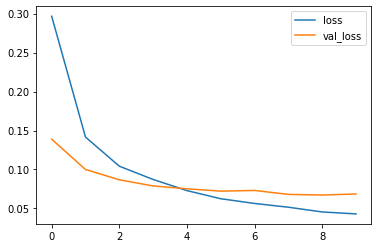

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

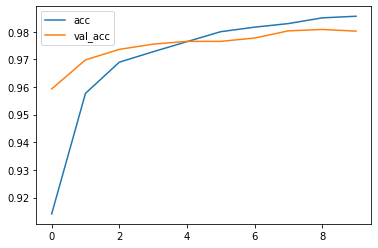

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9802


In [ ]:
test_loss, test_acc

(0.06852096319198608, 0.9801999926567078)

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
import random

i = random.randint(0, len(predictions)-1)
p_test = predictions.argmax(axis=-1)
# print(predictions[i])
print(p_test)

# plt.imshow(X_test[i])
# print(f"{p_test} {X_test[i]}")
# np.argmax(predictions[i])

[7 2 1 ... 4 5 6]


(198,)
Test Loss: 0.06852096319198608
Test Accuracy: 0.9801999926567078


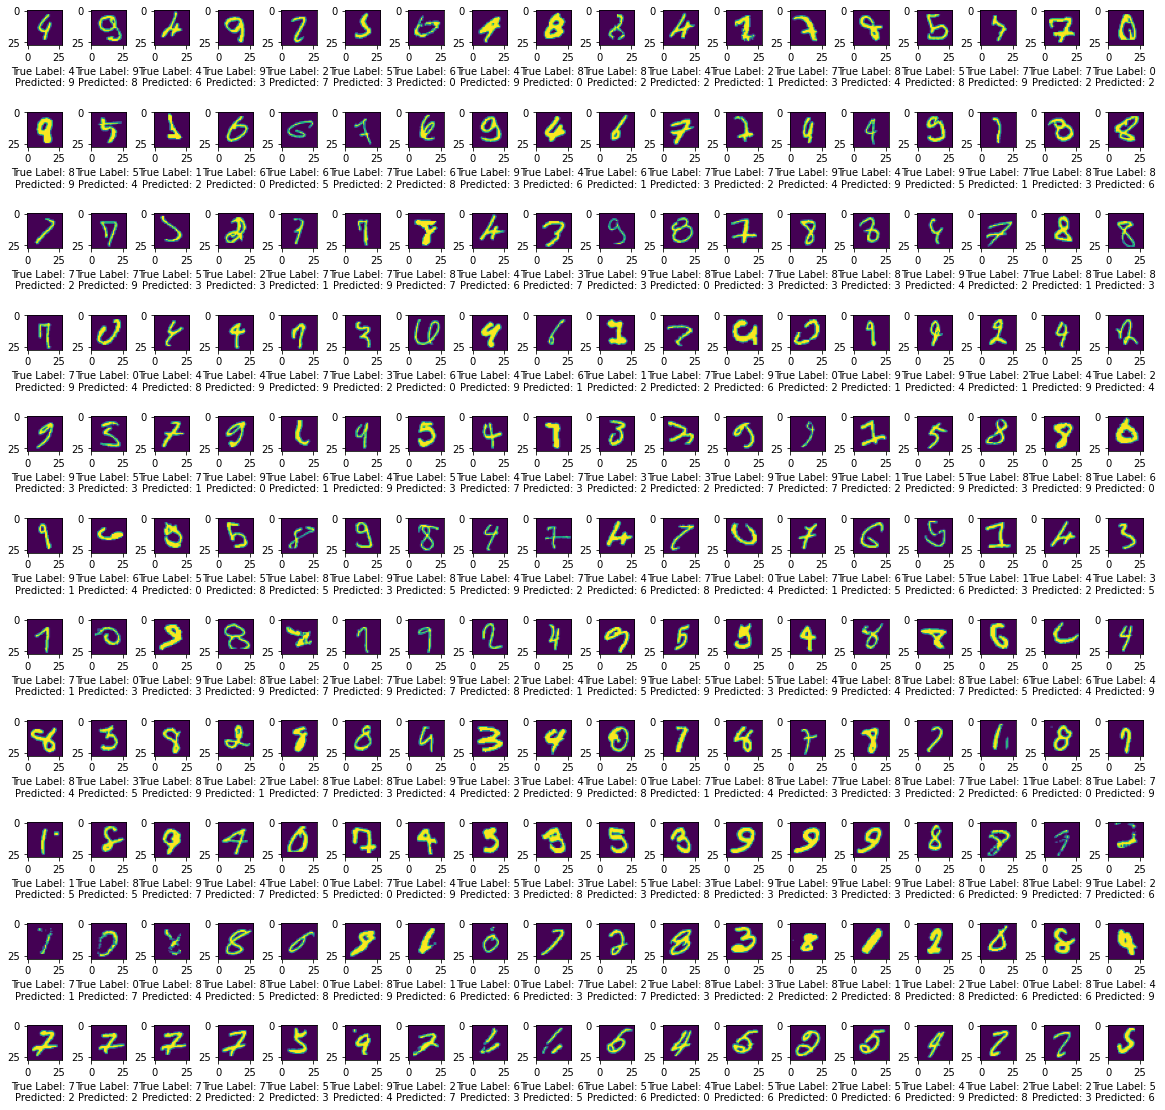

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

misclassified_idx = np.where(p_test != y_test)[0]
print(misclassified_idx.shape)

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.8)

for i, n in enumerate(misclassified_idx):
  ax = fig.add_subplot(11, 18, i+1)
  plt.imshow(X_test[n])
  # plt.show()
  ax.set_xlabel(f"True Label: {y_test[n]} \nPredicted: {np.argmax(predictions[n])}")

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")